<center><img src="https://i.imgur.com/zRrFdsf.png" width="700"></center>

LEONARDDO LÓPEZ

### Exercise 1
<div class="alert-success">

1. Reproject your country's map layers.
2. Plot the reprojected layers
3. Save the reprojected layers as **gpkg**.
    
</div>

## Reprojecting

A projected CRS will have units in meters or feet (or similar). You can request a crs per country [here](https://epsg.io/?q=brazil+kind%3APROJCRS):

In [5]:
import os, geopandas as gpd
countries=gpd.read_file(os.path.join("maps","World_country","World_Countries.shp"))


In [6]:
argentina=countries[countries.COUNTRY=='Argentina']

In [7]:
argentina.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
# check units of measurement
argentina.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [9]:
# is this CRS projected?
argentina.crs.is_projected

False

In [10]:
# recommended for Argentina in general (meters)
argentina.to_crs(5343).crs.axis_info

[Axis(name=Northing, abbrev=X, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Easting, abbrev=Y, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

<Axes: >

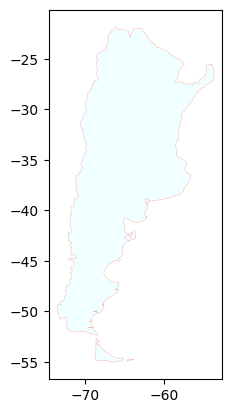

In [11]:
argentina.plot(facecolor="azure",#color of polygon fill
               edgecolor='red', #color of lines
               linewidth=0.1) #thickness of lines

In [12]:
prov=gpd.read_file(os.path.join("maps","Provincias","provinciaPolygon.shp"))
ferrov=gpd.read_file(os.path.join("maps","Ferroviarias","lineas_de_transporte_ferroviario_AN010Line.shp"))
energy=gpd.read_file(os.path.join("maps","Energia","puntos_de_energia_AD010Point.shp"))

Verifiquemos que todas las layers se encuentren proyectadas

In [13]:
prov.crs.is_projected

False

In [14]:
ferrov.crs.is_projected

False

In [15]:
energy.crs.is_projected

False

Dado que ninguna se encuentra poyectada, es necesario realizar el siguiente procedimiento

In [16]:
prov.to_crs(5343).crs.axis_info

[Axis(name=Northing, abbrev=X, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Easting, abbrev=Y, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [17]:
ferrov.to_crs(5343).crs.axis_info

[Axis(name=Northing, abbrev=X, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Easting, abbrev=Y, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [18]:
energy.to_crs(5343).crs.axis_info

[Axis(name=Northing, abbrev=X, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Easting, abbrev=Y, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

<Axes: >

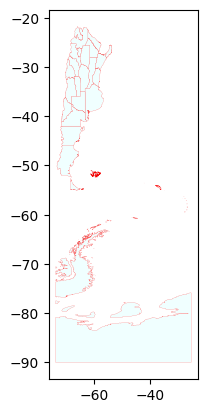

In [19]:
prov.plot(facecolor="azure",#color of polygon fill
               edgecolor='red', #color of lines
               linewidth=0.1) #thickness of lines

<Axes: >

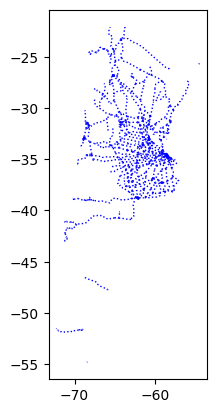

In [20]:
ferrov.plot(edgecolor='blue',
            linewidth=1,
            linestyle='dotted')

<Axes: >

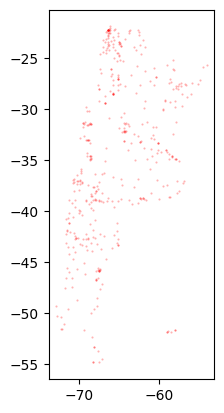

In [21]:
energy.plot(marker='.', # marker type
            color='red',
            markersize=1,
            alpha=0.3) # transparency

Adicionamos las tres capas anteriores a la primera capa que sacamos

<Axes: >

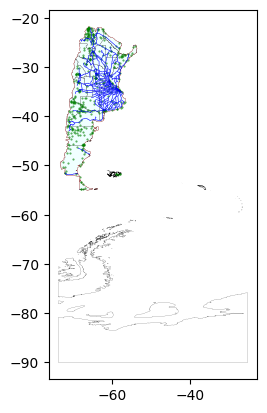

In [22]:
base = argentina.plot(facecolor="azure",
               edgecolor='red',
               linewidth=0.15)
prov.plot(facecolor="None",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(12,12),ax=base)

ferrov.plot(edgecolor='blue', linewidth=0.4,
            ax=base)# on top of...
energy.plot(marker='.', color='green', markersize=1,alpha=0.7,
            ax=base) # on top of...


Ahora salvamos el mapa en un archivo GPKG

In [23]:
## saving

import os

argentina.to_file(os.path.join("maps","argentinaMap_5343.gpkg"), layer='World_country', driver="GPKG")
prov.to_file(os.path.join("maps","provincia.gpkg"), layer='Provincias', driver="GPKG")
ferrov.to_file(os.path.join("maps","ferrovias.gpkg"), layer='Ferroviarias', driver="GPKG")
energy.to_file(os.path.join("maps","energia.gpkg"), layer='Energia', driver="GPKG")

### Exercise 2
<div class="alert-success">

1. Find the airports for your country [here](https://ourairports.com/data/). The data is in a CSV file.
2. Create projected layer of airports.
3. Plot all the layers and airports on top.
    
</div>

## Creating Spatial data

You have a "data"folder in **Paideia** with a CSV file with information on the airports in Brazil. Create a similar 'data' folder in your local computer, inside the current _repo_.

Let's open the **CSV**:

In [24]:
import pandas as pd

infoairports=pd.read_csv(os.path.join("data","ar-airports.csv"))

In [25]:
infoairports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,scheduled_service,gps_code,icao_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,5781,SAEZ,large_airport,Minister Pistarini International Airport,-34.822200,-58.535800,67.0,SA,Argentina,AR,...,1,SAEZ,SAEZ,EZE,EZE,http://www.aa2000.com.ar/index.php,https://en.wikipedia.org/wiki/Ministro_Pistari...,"BUE, Ezeiza",1275,2022-10-27T15:05:29+00:00
1,5771,SABE,large_airport,Jorge Newbery Airpark,-34.559200,-58.415600,18.0,SA,Argentina,AR,...,1,SABE,SABE,AEP,AER,NaN,https://en.wikipedia.org/wiki/Aeroparque_Jorge...,NaN,1050,2021-10-07T15:55:36+00:00
2,5835,SAWH,medium_airport,Ushuaia - Malvinas Argentinas International Ai...,-54.843300,-68.295800,102.0,SA,Argentina,AR,...,1,SAWH,SAWH,USH,USU,NaN,https://en.wikipedia.org/wiki/Ushuaia_%E2%80%9...,NaN,750,2025-03-22T20:48:42+00:00
3,5806,SARI,medium_airport,Cataratas Del Iguazú International Airport,-25.737301,-54.473400,916.0,SA,Argentina,AR,...,1,SARI,SARI,IGR,IGU,http://www.aa2000.com.ar/iguazu,https://en.wikipedia.org/wiki/Cataratas_del_Ig...,Iguaçu,750,2018-09-13T12:34:47+00:00
4,5831,SAWC,medium_airport,El Calafate - Commander Armando Tola Internati...,-50.280300,-72.053101,669.0,SA,Argentina,AR,...,1,SAWC,NaN,FTE,ECA,http://www.aeropuertoelcalafate.com/en/,https://en.wikipedia.org/wiki/Comandante_Arman...,NaN,500,2022-01-12T18:23:15+00:00


In [26]:
infoairports.reset_index(drop=True, inplace=True)
infoairports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,scheduled_service,gps_code,icao_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,5781,SAEZ,large_airport,Minister Pistarini International Airport,-34.822200,-58.535800,67.0,SA,Argentina,AR,...,1,SAEZ,SAEZ,EZE,EZE,http://www.aa2000.com.ar/index.php,https://en.wikipedia.org/wiki/Ministro_Pistari...,"BUE, Ezeiza",1275,2022-10-27T15:05:29+00:00
1,5771,SABE,large_airport,Jorge Newbery Airpark,-34.559200,-58.415600,18.0,SA,Argentina,AR,...,1,SABE,SABE,AEP,AER,NaN,https://en.wikipedia.org/wiki/Aeroparque_Jorge...,NaN,1050,2021-10-07T15:55:36+00:00
2,5835,SAWH,medium_airport,Ushuaia - Malvinas Argentinas International Ai...,-54.843300,-68.295800,102.0,SA,Argentina,AR,...,1,SAWH,SAWH,USH,USU,NaN,https://en.wikipedia.org/wiki/Ushuaia_%E2%80%9...,NaN,750,2025-03-22T20:48:42+00:00
3,5806,SARI,medium_airport,Cataratas Del Iguazú International Airport,-25.737301,-54.473400,916.0,SA,Argentina,AR,...,1,SARI,SARI,IGR,IGU,http://www.aa2000.com.ar/iguazu,https://en.wikipedia.org/wiki/Cataratas_del_Ig...,Iguaçu,750,2018-09-13T12:34:47+00:00
4,5831,SAWC,medium_airport,El Calafate - Commander Armando Tola Internati...,-50.280300,-72.053101,669.0,SA,Argentina,AR,...,1,SAWC,NaN,FTE,ECA,http://www.aeropuertoelcalafate.com/en/,https://en.wikipedia.org/wiki/Comandante_Arman...,NaN,500,2022-01-12T18:23:15+00:00


In [29]:
#visualizamos la columnas con las que nos queremos quedar
infoairports.columns

Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'country_name', 'iso_country',
       'region_name', 'iso_region', 'local_region', 'municipality',
       'scheduled_service', 'gps_code', 'icao_code', 'iata_code', 'local_code',
       'home_link', 'wikipedia_link', 'keywords', 'score', 'last_updated'],
      dtype='object')

In [30]:
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]

infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           956 non-null    object 
 1   type           956 non-null    object 
 2   latitude_deg   956 non-null    float64
 3   longitude_deg  956 non-null    float64
 4   elevation_ft   923 non-null    float64
 5   region_name    956 non-null    object 
 6   municipality   941 non-null    object 
dtypes: float64(3), object(4)
memory usage: 52.4+ KB


In [31]:
#Ello con el fin de visualizar el conteo de aereopuertos
infoairports.rename(columns={'type':'kind'},inplace=True)

In [32]:
#En caso la data no este presentada de manera correcta, se formatea de la siguietne manera.
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

In [55]:
argentina = argentina.to_crs(5343)

<Axes: >

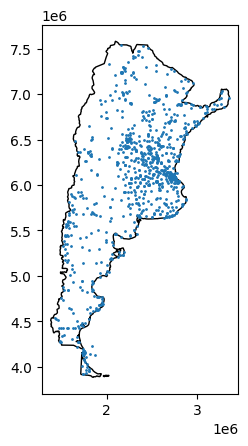

In [56]:
infoairports = gpd.GeoDataFrame(
    infoairports, geometry=gpd.points_from_xy(infoairports.longitude_deg, infoairports.latitude_deg), crs="EPSG:4326"
)

# Now that infoairports is a GeoDataFrame, .to_crs() can be used
argentina_airports = infoairports.to_crs(5343)

base = argentina.plot(color='white', edgecolor='black')
argentina_airports.plot(ax=base, markersize=1)

In [58]:
argentina_airports.rename(columns={'type':'kind'},inplace=True)

In [60]:
argentina_airports['kind'].value_counts()

,count
kind,
small_airport,694
heliport,148
medium_airport,69
closed,42
large_airport,2
balloonport,1


In [61]:
#Guardamos el archivo
argentina_airports.to_file(os.path.join("maps","argentina_airports.gpkg"), layer='airports', driver="GPKG")

### Exercise 3

<div class="alert-success">
    
1. Check if your country is a polygon or multipolygon.
    
2. Recover just the boundaries of that country.
    
3. Turn the boundary into a GDF.
</div>

<a class="anchor" id="11"></a>

## Formating Geoseries projections



You know **brazil_5641** is a multipolygon:

In [62]:
argentina

,COUNTRY,geometry
10,Argentina,"MULTIPOLYGON (((1588143.493 5963164.866, 15912..."


Sometime, you just need the border (lines):

In [63]:
argentina.boundary

,0
10,"MULTILINESTRING ((1588143.493 5963164.866, 159..."


<Axes: >

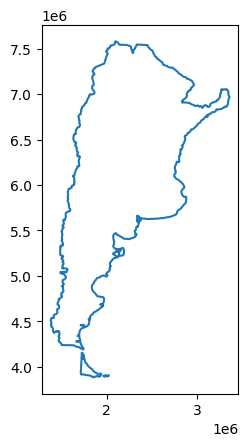

In [64]:
# This is just the borderline
argentina.boundary.plot()

Always check the data type:

In [66]:
# does 'boundary' return a GDF?
type(argentina.boundary)

geopandas.geoseries.GeoSeries

Some operations in geopandas require GDF or GS. If you need a GDF instead of a GS:

In [82]:
# converting into GDF
argentina.boundary.to_frame()

,0
10,"MULTILINESTRING ((1588143.493 5963164.866, 159..."


Notice you get a very simple GDF, and you may want to add some information:

In [83]:
# conversion
argentina_border=argentina.boundary.to_frame()

# renaming the geometry column
argentina_border.rename(columns={0:'geometry'},inplace=True)

#setting the geometry (the name is not enough)
argentina_border = argentina_border.set_geometry("geometry")

# verifying:
argentina_border.crs

<Projected CRS: EPSG:5343>
Name: POSGAR 2007 / Argentina 1
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Argentina - west of 70°30'W.
- bounds: (-73.59, -52.0, -70.5, -36.16)
Coordinate Operation:
- name: Argentina zone 1
- method: Transverse Mercator
Datum: Posiciones Geodesicas Argentinas 2007
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [84]:
argentina_border.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1 entries, 10 to 10
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  1 non-null      geometry
dtypes: geometry(1)
memory usage: 16.0 bytes


You can add this GDF as a layer.

<a class="anchor" id="12"></a>

## Maps Lacking CRS information

Reprojecting seems a simple process, but you might find some interesting cases.

Download the compressed file "Brazil_subnational". Unzip or decompress that files. Move the decompressed folder into your current _maps_ folder.

Let's read the maps on _states_(adm1) and _municipalities_ (adm2):

In [73]:
arg_depas=gpd.read_file(os.path.join("maps","Departamentos","departamentoPolygon.shp"))
arg_provincias=gpd.read_file(os.path.join("maps","Provincias","provinciaPolygon.shp"))

They are maps, for sure:

In [74]:
type(arg_depas), type(arg_provincias)

(geopandas.geodataframe.GeoDataFrame, geopandas.geodataframe.GeoDataFrame)

In [75]:
arg_depas.geometry.head()

,geometry
0,"POLYGON ((-64.05988 -28.85665, -64.0579 -28.85..."
1,"POLYGON ((-64.62099 -28.16594, -64.5405 -28.17..."
2,"POLYGON ((-57.86023 -35.68635, -57.85231 -35.6..."
3,"POLYGON ((-69.75504 -39.87796, -69.75504 -39.8..."
4,"POLYGON ((-58.38609 -34.57823, -58.38592 -34.5..."


In [76]:
arg_provincias.geometry.head()

,geometry
0,"POLYGON ((-58.45535 -34.52776, -58.45404 -34.5..."
1,"POLYGON ((-67.05547 -31.85605, -67.05 -31.8574..."
2,"POLYGON ((-61.04639 -27.998, -61.00805 -27.998..."
3,"POLYGON ((-68.52136 -27.81792, -68.52148 -27.8..."
4,"POLYGON ((-68.50537 -25.16851, -68.50386 -25.1..."


But, notice this:

In [77]:
arg_depas.crs, arg_provincias.crs

(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

They do not have crs information, however they can be plotted:

<Axes: >

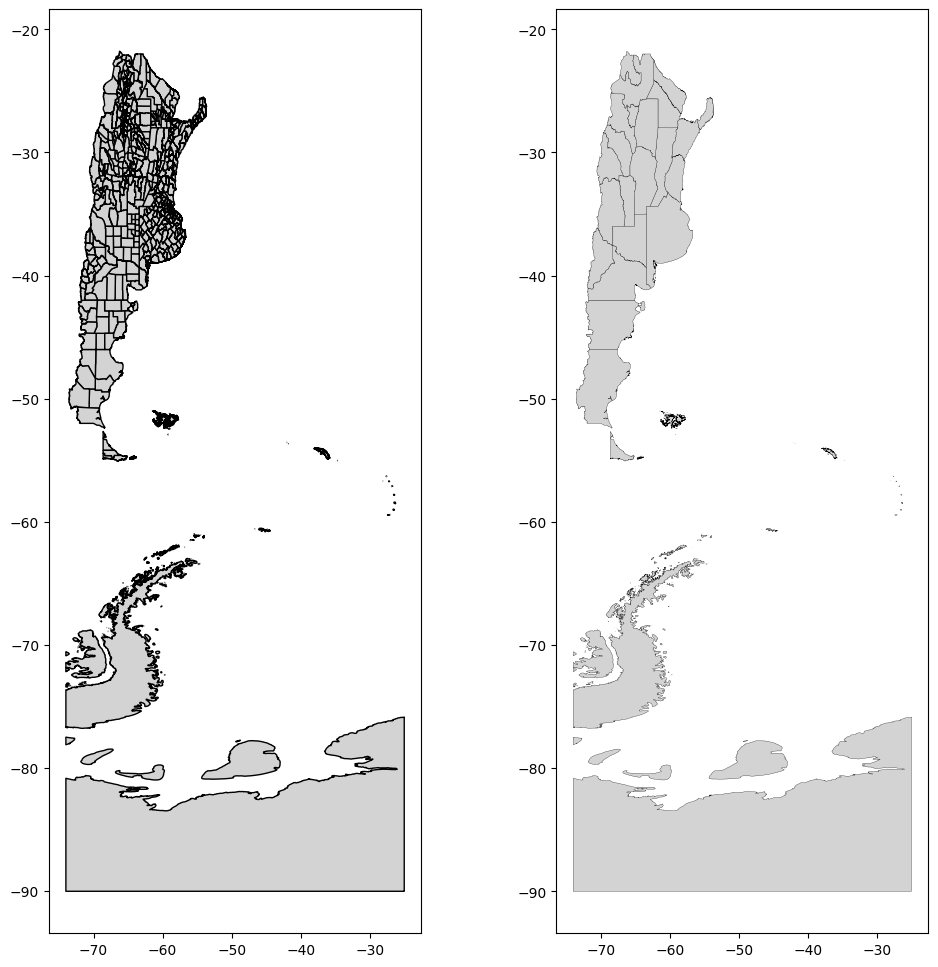

In [78]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

arg_depas.plot(ax=ax1, facecolor='lightgrey', edgecolor='black')
arg_provincias.plot(ax=ax2, facecolor='lightgrey', edgecolor='black',linewidth=0.2)


From the plots above and the rows seen, we conclude the maps are unprojected; then:

In [79]:
# set as unprojected
arg_depas.crs = "EPSG:4326"
arg_provincias.crs = "EPSG:4326"

Now, we can reproject:

In [80]:
arg_depas=arg_depas.to_crs(5343)
arg_provincias=arg_provincias.to_crs(5343)

In [81]:
arg_depas.to_file(os.path.join("maps","argMaps_5641.gpkg"), layer='depaartamentos', driver="GPKG")
arg_provincias.to_file(os.path.join("maps","argMaps_5641.gpkg"), layer='provincias', driver="GPKG")

### Exercise 4

<div class="alert-success">

1. Look for sub administrative divisions of your country
2. Check all the CRSs of those divisions
3. If you find one CRS is missing, fill the CRS with the right projection. If not, just state nothing is to be done.
</div>

## Geo Merging

The countries map has no interesting information beyond the geometry.

In [131]:
linkEdu="https://github.com/LeonarddoCLS/PC3_20232345/raw/refs/heads/main/Education%20expenditures.csv"
education=pd.read_csv(linkEdu)
education.head()

,name,slug,% of GDP,date_of_information,ranking,region
0,Marshall Islands,marshall-islands,13.6,2020,1,Australia and Oceania
1,Solomon Islands,solomon-islands,12.8,2020,2,Australia and Oceania
2,Kiribati,kiribati,12.4,2019,3,Australia and Oceania
3,Greenland,greenland,10.2,2019,4,North America
4,Bolivia,bolivia,9.8,2020,5,South America


In [132]:
import re
clean_column_names = lambda df: df.columns.astype(str).str.strip().str.replace(pat=r'\s', repl='_', regex=True)

education_1.columns = clean_column_names(education)


NameError: name 'education_1' is not defined

In [85]:
countries.head()

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


Let add some information to each country:

In [86]:
import pandas as pd

fragilityCiaLink="https://github.com/CienciaDeDatosEspacial/merging/raw/main/FragilityCia_isos.csv"

fragilityCia=pd.read_csv(fragilityCiaLink)

fragilityCia.head()

,Country,Officialstatename,InternetccTLD,iso2,iso3,fragility,co2,region,ForestRev_gdp
0,AFGHANISTAN,The Islamic Republic of Afghanistan,.af,AF,AFG,105.0,7893000.0,SOUTH ASIA,0.20
1,ALBANIA,The Republic of Albania,.al,AL,ALB,58.9,3794000.0,EUROPE,0.18
2,ALGERIA,The People's Democratic Republic of Algeria,.dz,DZ,DZA,75.4,151633000.0,AFRICA,0.10
3,ANGOLA,The Republic of Angola,.ao,AO,AGO,87.8,19362000.0,AFRICA,0.36
4,ANTIGUA AND BARBUDA,Antigua and Barbuda,.ag,AG,ATG,54.4,729000.0,CENTRAL AMERICA AND THE CARIBBEAN,0.00


We want to add the _fragilityCia_ data into the map. That is the merging process.
For that, we need a common column. The _Country_ column is the option.

In [87]:
# to upper case.
countries['COUNTRY']=countries.COUNTRY.str.upper()
education

It is very unlikely the names are written the same. Verify:

In [88]:
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)

Check here:

In [89]:
onlyFragilCia

{'BAHAMAS (THE)',
 'BOLIVIA (PLURINATIONAL STATE OF)',
 'BRUNEI DARUSSALAM',
 'CABO VERDE',
 'CENTRAL AFRICAN REPUBLIC (THE)',
 'COMOROS (THE)',
 'CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
 'CONGO (THE)',
 "CÔTE D'IVOIRE",
 'DOMINICAN REPUBLIC (THE)',
 'ESWATINI',
 'GAMBIA (THE)',
 'IRAN (ISLAMIC REPUBLIC OF)',
 'KOREA (THE REPUBLIC OF)',
 "LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",
 'MICRONESIA (FEDERATED STATES OF)',
 'MOLDOVA (THE REPUBLIC OF)',
 'NETHERLANDS (THE)',
 'NIGER (THE)',
 'NORTH MACEDONIA',
 'NORTHERN MARIANA ISLANDS (THE)',
 'PHILIPPINES (THE)',
 'RUSSIAN FEDERATION (THE)',
 'SAMOA',
 'SUDAN (THE)',
 'TANZANIA, THE UNITED REPUBLIC OF',
 'TIMOR-LESTE',
 'UNITED ARAB EMIRATES (THE)',
 'UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND (THE)',
 'UNITED STATES OF AMERICA (THE)',
 'VIET NAM'}

In [90]:
# and here
onlyMap

{'AMERICAN SAMOA (US)',
 'AMERICAN VIRGIN ISLANDS (US)',
 'ANDORRA',
 'ANGUILLA (UK)',
 'ANTARCTICA',
 'ARUBA (NETHERLANDS)',
 'BAHAMAS',
 'BAKER ISLAND (US)',
 'BERMUDA (UK)',
 'BOLIVIA',
 'BONAIRE (NETHERLANDS)',
 'BOUVET ISLAND (NORWAY)',
 'BRITISH INDIAN OCEAN TERRITORY (UK)',
 'BRITISH VIRGIN ISLANDS(UK)',
 'BRUNEI',
 'CAPE VERDE',
 'CAYMAN ISLANDS (UK)',
 'CENTRAL AFRICAN REPUBLIC',
 'CHRISTMAS ISLAND (AUSTRALIA)',
 'COCOS (KEELING) ISLANDS (AUSTRALIA)',
 'COMOROS',
 'CONGO',
 'COOK ISLANDS (NEW ZEALAND)',
 'CURACAO (NETHERLANDS)',
 'CZECH REPUBLIC',
 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'DOMINICA',
 'DOMINICAN REPUBLIC',
 'EAST TIMOR',
 'ERITREA',
 'FALKLAND ISLANDS (UK)',
 'FAROE ISLANDS (DENMARK)',
 'FEDERATED STATES OF MICRONESIA',
 'FRENCH GUIANA (FRANCE)',
 'FRENCH POLYNESIA (FRANCE)',
 'FRENCH SOUTHERN & ANTARCTIC LANDS (FRANCE)',
 'GAMBIA',
 'GIBRALTAR (UK)',
 'GLORIOSO ISLANDS (FRANCE)',
 'GREENLAND (DENMARK)',
 'GUADELOUPE (FRANCE)',
 'GUAM (US)',
 'GUERNSEY (UK)',
 'HE

## Fuzzy merging

Let's find similar names:

In [92]:
!pip install thefuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 29.6 MB/s eta 0:00:00


In [93]:
from thefuzz import process

[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[('BAHAMAS (THE)', ('BAHAMAS', 90)),
 ('BOLIVIA (PLURINATIONAL STATE OF)', ('BOLIVIA', 90)),
 ('BRUNEI DARUSSALAM', ('BRUNEI', 90)),
 ('CABO VERDE', ('CAPE VERDE', 80)),
 ('CENTRAL AFRICAN REPUBLIC (THE)', ('CENTRAL AFRICAN REPUBLIC', 95)),
 ('COMOROS (THE)', ('COMOROS', 90)),
 ('CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
  ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO (THE)', ('CONGO', 90)),
 ("CÔTE D'IVOIRE", ('IVORY COAST', 58)),
 ('DOMINICAN REPUBLIC (THE)', ('DOMINICAN REPUBLIC', 95)),
 ('ESWATINI', ('MARTINIQUE (FRANCE)', 60)),
 ('GAMBIA (THE)', ('GAMBIA', 90)),
 ('IRAN (ISLAMIC REPUBLIC OF)', ('IRAN', 90)),
 ('KOREA (THE REPUBLIC OF)', ('CZECH REPUBLIC', 86)),
 ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", ('CZECH REPUBLIC', 86)),
 ('MICRONESIA (FEDERATED STATES OF)', ('FEDERATED STATES OF MICRONESIA', 95)),
 ('MOLDOVA (THE REPUBLIC OF)', ('MOLDOVA', 90)),
 ('NETHERLANDS (THE)', ('NETHERLANDS', 95)),
 ('NIGER (THE)', ('NIGER', 90)),
 ('NORTH MACEDONIA', ('MACEDONIA', 90)),
 ('N

In [94]:
# keeping high scores

[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)
 if process.extractOne(country,onlyMap)[1]>=90]

[('BAHAMAS (THE)', ('BAHAMAS', 90)),
 ('BOLIVIA (PLURINATIONAL STATE OF)', ('BOLIVIA', 90)),
 ('BRUNEI DARUSSALAM', ('BRUNEI', 90)),
 ('CENTRAL AFRICAN REPUBLIC (THE)', ('CENTRAL AFRICAN REPUBLIC', 95)),
 ('COMOROS (THE)', ('COMOROS', 90)),
 ('CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
  ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO (THE)', ('CONGO', 90)),
 ('DOMINICAN REPUBLIC (THE)', ('DOMINICAN REPUBLIC', 95)),
 ('GAMBIA (THE)', ('GAMBIA', 90)),
 ('IRAN (ISLAMIC REPUBLIC OF)', ('IRAN', 90)),
 ('MICRONESIA (FEDERATED STATES OF)', ('FEDERATED STATES OF MICRONESIA', 95)),
 ('MOLDOVA (THE REPUBLIC OF)', ('MOLDOVA', 90)),
 ('NETHERLANDS (THE)', ('NETHERLANDS', 95)),
 ('NIGER (THE)', ('NIGER', 90)),
 ('NORTH MACEDONIA', ('MACEDONIA', 90)),
 ('NORTHERN MARIANA ISLANDS (THE)', ('NORTHERN MARIANA ISLANDS (US)', 91)),
 ('PHILIPPINES (THE)', ('PHILIPPINES', 95)),
 ('RUSSIAN FEDERATION (THE)', ('RUSSIA', 90)),
 ('SAMOA', ('AMERICAN SAMOA (US)', 90)),
 ('SUDAN (THE)', ('SUDAN', 90)),
 ('TANZ

Preparing a _dict_ of changes:

In [95]:
# then:
try1={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragilCia)
 if process.extractOne(country,onlyMap)[1]>=90}
try1

{'BAHAMAS (THE)': 'BAHAMAS',
 'BOLIVIA (PLURINATIONAL STATE OF)': 'BOLIVIA',
 'BRUNEI DARUSSALAM': 'BRUNEI',
 'CENTRAL AFRICAN REPUBLIC (THE)': 'CENTRAL AFRICAN REPUBLIC',
 'COMOROS (THE)': 'COMOROS',
 'CONGO (THE DEMOCRATIC REPUBLIC OF THE)': 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'CONGO (THE)': 'CONGO',
 'DOMINICAN REPUBLIC (THE)': 'DOMINICAN REPUBLIC',
 'GAMBIA (THE)': 'GAMBIA',
 'IRAN (ISLAMIC REPUBLIC OF)': 'IRAN',
 'MICRONESIA (FEDERATED STATES OF)': 'FEDERATED STATES OF MICRONESIA',
 'MOLDOVA (THE REPUBLIC OF)': 'MOLDOVA',
 'NETHERLANDS (THE)': 'NETHERLANDS',
 'NIGER (THE)': 'NIGER',
 'NORTH MACEDONIA': 'MACEDONIA',
 'NORTHERN MARIANA ISLANDS (THE)': 'NORTHERN MARIANA ISLANDS (US)',
 'PHILIPPINES (THE)': 'PHILIPPINES',
 'RUSSIAN FEDERATION (THE)': 'RUSSIA',
 'SAMOA': 'AMERICAN SAMOA (US)',
 'SUDAN (THE)': 'SUDAN',
 'TANZANIA, THE UNITED REPUBLIC OF': 'TANZANIA',
 'UNITED ARAB EMIRATES (THE)': 'UNITED ARAB EMIRATES',
 'UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND (THE)': 'U

Making changes and updating:

In [96]:
fragilityCia.replace(to_replace={'Country':try1},inplace=True)

# updating
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)
# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[('CABO VERDE', ('CAPE VERDE', 80)),
 ("CÔTE D'IVOIRE", ('IVORY COAST', 58)),
 ('ESWATINI', ('MARTINIQUE (FRANCE)', 60)),
 ('KOREA (THE REPUBLIC OF)', ('CZECH REPUBLIC', 86)),
 ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", ('CZECH REPUBLIC', 86)),
 ('TIMOR-LESTE', ('EAST TIMOR', 81))]

In [97]:
# some manual

countries[countries.COUNTRY.str.contains('LAO|SWA|KOR')]

,COUNTRY,geometry
17,BOTSWANA,"POLYGON ((26.40114 -24.63189, 26.38996 -24.627..."
120,NORTH KOREA,"POLYGON ((125.62979 38.65694, 125.51721 38.717..."
122,SOUTH KOREA,"MULTIPOLYGON (((126.86922 36.0606, 126.8591 36..."
126,LAOS,"POLYGON ((104.257 17.88763, 104.23943 17.93722..."
243,SWAZILAND,"POLYGON ((30.89944 -26.77195, 30.88028 -26.793..."


In [98]:
manualChanges={'SWAZILAND':'ESWATINI','LAOS':"LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",'SOUTH KOREA':'KOREA (THE REPUBLIC OF)'}

countries.replace(to_replace={'COUNTRY':manualChanges},inplace=True)

# updating
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)
# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[('CABO VERDE', ('CAPE VERDE', 80)),
 ("CÔTE D'IVOIRE", ('IVORY COAST', 58)),
 ('TIMOR-LESTE', ('EAST TIMOR', 81))]

In [99]:
# then:
try2={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragilCia)}
try2

{'CABO VERDE': 'CAPE VERDE',
 "CÔTE D'IVOIRE": 'IVORY COAST',
 'TIMOR-LESTE': 'EAST TIMOR'}

In [100]:
# changing
fragilityCia.replace(to_replace={'Country':try2},inplace=True)

# new update
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)

# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[]

We can not improve the situation.

Now, when you merge a GDF with a DF, **the GDF has to be on the left**:

In [101]:
theMapAndData=countries.merge(fragilityCia,left_on='COUNTRY', right_on='Country')

theMapAndData.drop(columns=['Country'],inplace=True) # no need for this column
# here it is (new map):
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   COUNTRY            170 non-null    object  
 1   geometry           170 non-null    geometry
 2   Officialstatename  170 non-null    object  
 3   InternetccTLD      170 non-null    object  
 4   iso2               169 non-null    object  
 5   iso3               170 non-null    object  
 6   fragility          170 non-null    float64 
 7   co2                170 non-null    float64 
 8   region             170 non-null    object  
 9   ForestRev_gdp      170 non-null    float64 
dtypes: float64(3), geometry(1), object(6)
memory usage: 13.4+ KB


# Choropleths

## Transformation of data values

### Re Scaling

We should plan how to color the polygons based on some variable, let me check our variables of interest:

In [102]:
DataNames=['fragility', 'co2', 'ForestRev_gdp']

In [103]:

pd.melt(theMapAndData[DataNames])

,variable,value
0,fragility,54.40
1,fragility,105.00
2,fragility,75.40
3,fragility,73.20
4,fragility,58.90
...,...,...
505,ForestRev_gdp,4.45
506,ForestRev_gdp,1.61
507,ForestRev_gdp,2.65
508,ForestRev_gdp,0.39


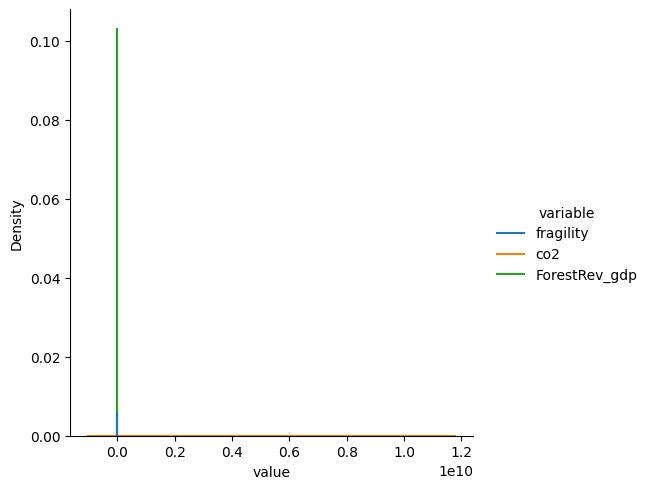

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(pd.melt(theMapAndData[DataNames]),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

The variables are in different units, we should try a data rescaling strategy:

In [105]:
!pip install -U scikit-learn

* **StandardScaler**:

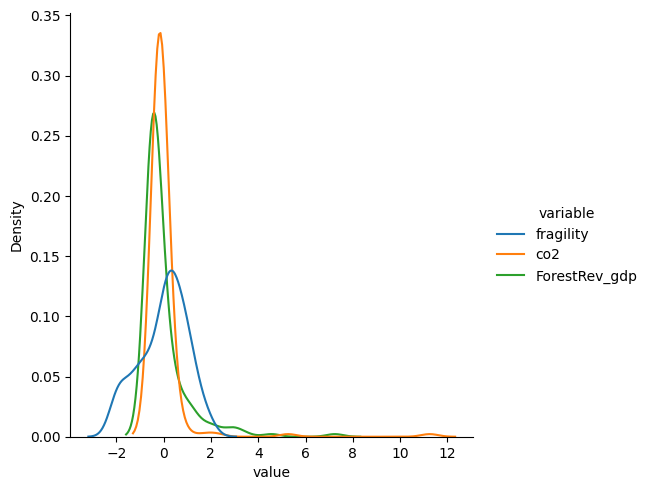

In [106]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_data = scaler.fit_transform(theMapAndData[DataNames])
sns.displot(pd.melt(pd.DataFrame(normalized_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

* **MinMaxScaler**:

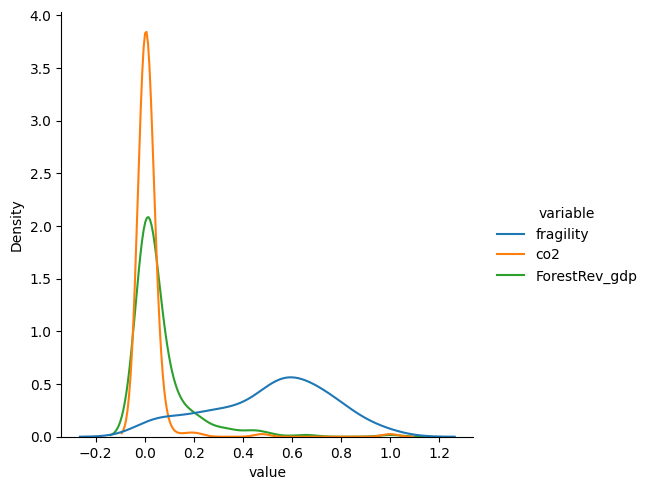

In [107]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data=scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(scaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

* **RobustScaler**:

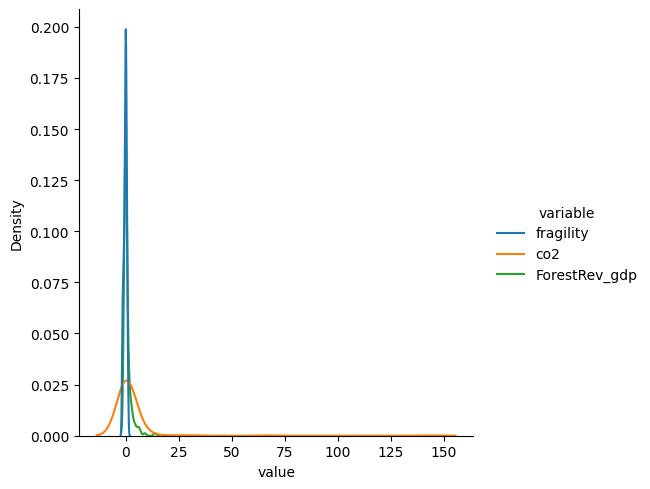

In [108]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
robScaled_data = scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(robScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

* **QuantileTransformer**:

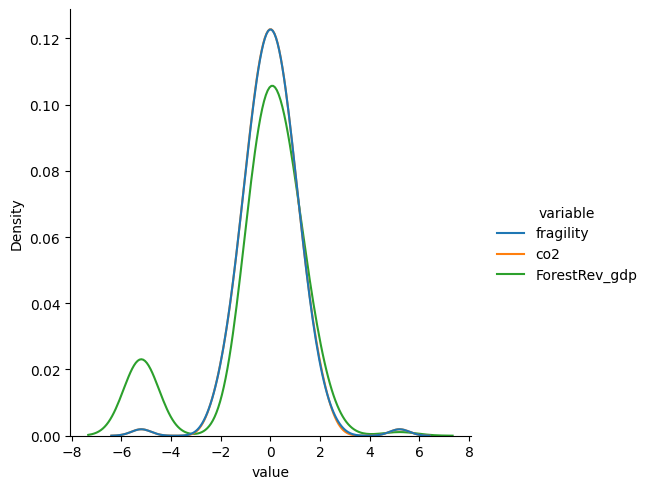

In [109]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(n_quantiles=99, random_state=0,output_distribution='normal') #or 'uniform'
QtScaled_data = scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(QtScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

Let's keep the last one:

In [110]:
theMapAndData['fragility_Qt']=QtScaled_data[:,0]

### Discretizing

I will keep the _data_Qt_ data frame. Now, I want cut the data.
Please install [**numba**](https://numba.readthedocs.io/en/stable/user/installing.html) before runing the next code; also make sure you have **pysal**, **mapclassify** and **numpy** installed:

In [111]:
! pip show numba mapclassify numpy

Name: numba
Version: 0.60.0
Summary: compiling Python code using LLVM
Home-page: https://numba.pydata.org
Author: 
Author-email: 
License: BSD
Location: /usr/local/lib/python3.11/dist-packages
Requires: llvmlite, numpy
Required-by: cudf-cu12, cuml-cu12, dask-cuda, distributed-ucxx-cu12, librosa, numba-cuda, pynndescent, shap, stumpy, umap-learn
---
Name: numpy
Version: 2.0.2
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2024, NumPy Developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are
met:

    * Redistributions of source code must retain the above copyright
       notice, this list of conditions and the following disclaimer.

    * Redistributions in binary form must reproduce the above
       copyright notice, this list of conditions and the following

In [113]:
!pip install mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.7/286.7 kB 4.7 MB/s eta 0:00:00


Let me discretize **fragility_Qt**:

In [114]:
import mapclassify
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=theMapAndData.fragility_Qt
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

How can we select the right classification?
Let me use the the Absolute deviation around class median (ADCM) to make the comparisson:

In [115]:
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

Now, plot the **adcms**:

<Axes: ylabel='Classifier'>

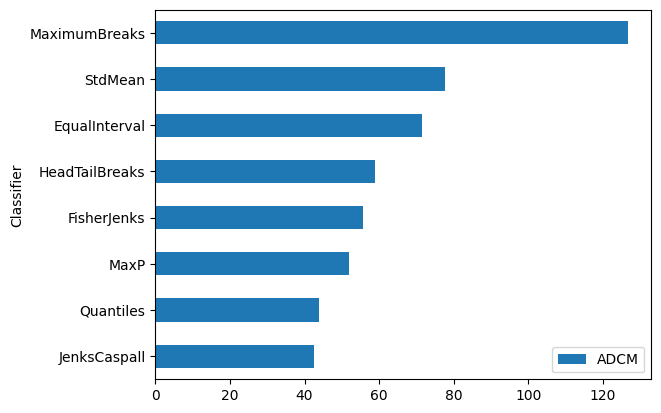

In [116]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')

Let's save the best strategy:

In [117]:
theMapAndData['fragility_Qt_jc5'] = jc5.yb

In [118]:
# there you are
theMapAndData[['fragility_Qt','fragility_Qt_jc5']].head()

,fragility_Qt,fragility_Qt_jc5
0,-0.559624,1
1,1.824703,4
2,0.281088,2
3,0.209853,2
4,-0.451880,1


Let's check the mean of 'fragility_Qt' by the labels of the columns created (from '0' to '4')

In [119]:
indexList=['fragility_Qt_jc5'] # add more?
aggregator={'fragility_Qt': ['mean']}

pd.concat([theMapAndData[['fragility_Qt',col]].groupby(col,as_index=False).agg(aggregator) for col in indexList],axis=1)

,fragility_Qt_jc5,fragility_Qt
,,mean
0,0,-1.613560
1,1,-0.609374
2,2,0.023169
3,3,0.664470
4,4,1.685858


We could create a new column:

In [120]:
# renaming
newLabelsForLevels={0:"0_Great", 1:"1_Good", 2:"2_Middle", 3:"3_Bad", 4:"4_Poor"}

theMapAndData['fragility_Qt_jc5_cat']=theMapAndData.loc[:,'fragility_Qt_jc5'].replace(newLabelsForLevels)

# we have
theMapAndData[['fragility_Qt','fragility_Qt_jc5','fragility_Qt_jc5_cat']].head(20)

,fragility_Qt,fragility_Qt_jc5,fragility_Qt_jc5_cat
0,-0.559624,1,1_Good
1,1.824703,4,4_Poor
2,0.281088,2,2_Middle
3,0.209853,2,2_Middle
4,-0.451880,1,1_Good
5,-0.203997,2,2_Middle
6,0.942215,3,3_Bad
7,-0.310136,1,1_Good
8,-0.796394,1,1_Good
9,-1.959964,0,0_Great


We are ready for a choropleth:

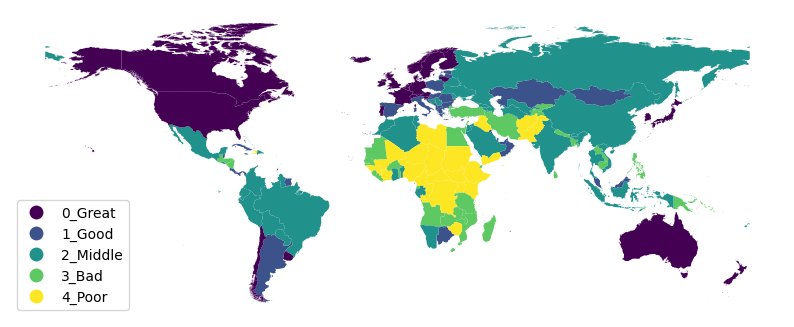

In [121]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='fragility_Qt_jc5_cat', # variable to plot
                   cmap='viridis', # set of colors
                   categorical=True, # can be interpreted as category
                   edgecolor='white', # border color
                   linewidth=0., # width of border
                   alpha=1, # level of transparency (0 is invisible)
                   legend=True, # need a legend?
                   # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
                   legend_kwds={'loc':"lower left"},
        ax=ax
       )

ax.set_axis_off()

However, once you know the ADCM, you can request the choropleth without creating a variable:

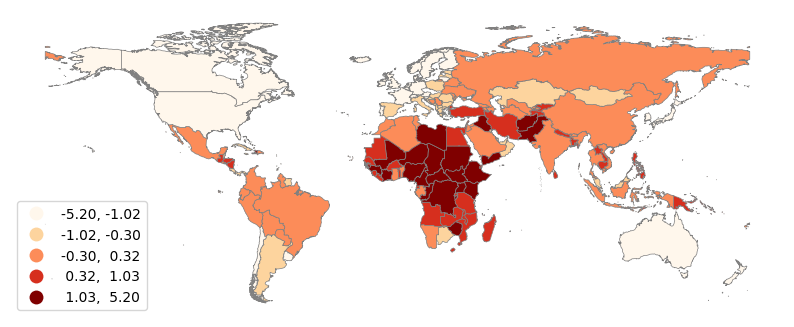

In [122]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='fragility_Qt',
                   cmap='OrRd',
                   scheme="jenkscaspall",k=5,
        edgecolor='grey',
        linewidth=0.5,
        alpha=1,
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

In [123]:
# finally

theMapAndData.to_file(os.path.join("maps","worldMaps.gpkg"), layer='indicators', driver="GPKG")

### Exercise 5

<div class="alert-success">

1. Transform the co2 and forest variables.
2. Discretize the result chosen.
3. Make the maps for the co2 and forest variables.
4. Add another variable (merge) from the web (or any other source). Transform it , discretize it, and map it.
   
    
</div>